<p style="text-align:center; font-size:32px; font-weight:bold; color:#000000;">¿Quién se come la comida que producimos?</p>
<p style="text-align:center; font-size:18px;"><em>Producción y distribucción de la Comida/Alimentos mundial, 1961-2013</em></p>

<p style="text-align:right; font-size:11px;"><em>Análisis Exploratorio de Datos ("EDA", por sus siglas en inglés) por Kevin Francisco Chacón Vargas, Abril 2019</em></p>

<img src="https://animalogic.ca/wp-content/uploads/2018/05/shutterstock_481623085.jpg" alt="Cows">

<div style="margin-top:-150px; opacity:0.92; background-color: white; padding:10px; border-radius:10px;">
<h2>Contexto</h2><br/>

Según proyecciones de las Naciones Unidas, la población va a crecer de los 7.3 billones de personas que habitamos hoy en el planeta tierra a 9.7 billones para el año 2050. Este crecimiento exponencial junto con los efectos del calentamiento global y la expectativa de vida, plantean grandes retos para solucionar la producción de alimentos que debemos tener para dar a vasto. (UN,2015)<br/><br/>

Países alrededor del globo terrestre enfocan sus actividades en la producción de alimentos que se adecúen a sus condiciones climáticas y les permiten aumentar su presencia en el mercado para su desarrollo como nación. Sin embargo, nos enfrentamos ante una situación en la que mucha de la comida que estamos produciendo requiere de recursos (alimentos) para su crecimiento, provocando esto una dependencia y lucha, por la distribución que debemos de dar en la producción y alimentación de esta. (UN,2015)<br/><br/>

Por esta razón, haciendo uso de uno de los dataset que provee la Organización de Comida y Agricultura de las Naciones Unidas, el siguiente trabajo provee una visión general de la producción que se hace en 245 países y territorios alrededor del mundo, para examinar la dinámica y distribución actual que se tiene de alimentos, con el fin de proyectar el comportamiento y posibles escenarios que se afrontarán en los años venideros.(UN,2015) <br/>
El dataset en estudio contiene datos de producción de alimentos desde el año 1961 hasta el 2013, distinguiendo en él la comida que se produce para los humanos como <strong>Food</strong> y la que se destina para los animales como <strong>Feed</strong>.</div>

<h2>Objetivos</h2><br/>

<u>Objetivo general:</u>

<p>Elaborar un análisis exploratorio de datos para encontrar <em>insights</em> que sugieran la distribución y dinámica en la producción de alimentos que se ha manejado desde el año 1961 hasta el 2013.</p>


<br/><u>Objetivo específicos:</u><br/><br/>
<li>Realizar una limpieza y transformación de los datos previo a su análisis.</li>
<li>Hacer uso de las librerías Pandas, NumPy y Matplotlib para normalizar, mapear y visualizar la información de manera más sencilla y gráfica.</li>
<li>Ejecutar operaciones matemáticas que denoten el comportamiento de los datos.</li>
<li>Generar conclusiones y sugerencias sobre los datos obtenidos a partir del análisis.</li>

<h2>Acerca del dataset</h2><br/>

Puede descargar el archivo en: https://www.kaggle.com/dorbicycle/world-foodfeed-production

<u>Análisis semántico</u>

La información que se presenta en el dataset es bastante clara. No utiliza codificación ni abreviaturas que dificultan el entendimiento del significativo en sus atributos. Los únicos conceptos que se deben de tener claros en su significado son:

<ul><strong>Food</strong>: Se refiere a los alimentos que son producidos para el consumo humano.</ul>

<ul><strong>Feed</strong>: Alimentos producidos para el consumo animal.</ul><br/>


<u>Análisis estructural</u>

Para comprender la estructura que presenta el dataset se hará la ingestión del mismo, invocando las librerías a utilizarse, y se declarará la función df.info().

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')


fao=pd.read_csv("World_food_feed_production/FAO.csv", encoding="latin")
fao.info()

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
Area Abbreviation    21477 non-null object
Area Code            21477 non-null int64
Area                 21477 non-null object
Item Code            21477 non-null int64
Item                 21477 non-null object
Element Code         21477 non-null int64
Element              21477 non-null object
Unit                 21477 non-null object
latitude             21477 non-null float64
longitude            21477 non-null float64
Y1961                17938 non-null float64
Y1962                17938 non-null float64
Y1963                17938 non-null float64
Y1964                17938 non-null float64
Y1965                17938 non-null float64
Y1966                17938 non-null float64
Y1967                17938 non-null float64
Y1968                17938 non-null float64
Y1969                17938 non-null float64
Y1970                17938 non-null float64
Y1971                1

Como se ve anterior, el dataset se compone de tres tipos de datos: **float64**, **int64** y **object**.

Asimismo, cuenta con 63 columnas con un total de 21477 filas. Por los resultados en cuanto a los valores "non-null", se puede pensar que algunas filas tienen valores nulos o bien, sin ningún dato en ellos. Más adelante se trabajará en el tratamiento de ellos.

Otro punto interesante es que se cuenta con datos de localización, unidades, categorías (items) e información temporal referente a los años en estudio.

Ahora bien, para dar un mejor vistazo a la composición del dataset se hace uso de la función dt.head():

In [2]:
fao.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


Anteriormente, se puede observar que el dataset ingerido contiene varias columnas que, para efectos de este análisis, no aportan valor por lo que, se procede a eliminarlas utilizando la función df.drop()

In [3]:
fao.drop(labels=["Area Code","Element Code","Unit"], axis=1)
fao.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


Habiendo eliminado las columnas, se puede notar que el dataframe tiene una forma clara en el acomodo de los datos para el ojo humano. Sin embargo, colocar la información de producción en columnas individuales (una por año) hace sumamente difícil el análsis de esta información. Para resolver lo anterior, se procede a realizar un "despivoteo" de los datos utilizando la función pd.melt().

Se hace uso de los años como "value_vars" para darle al dataset un acomodo donde la información se presenta de acuerdo al año y valor de producción que se tuvo, por "producto", "país" y "elemento", en él; los valores de "longitud" y "latitud" se toman como referencia para su posterior análisis.

In [4]:
fao=pd.melt(fao,id_vars= ["Area Abbreviation", "Area","Item","Element","latitude","longitude"] ,value_vars=["Y1961","Y1962","Y1963","Y1964","Y1965","Y1966","Y1967","Y1968","Y1969","Y1970","Y1971","Y1972","Y1973","Y1974","Y1975","Y1976","Y1977","Y1978","Y1979","Y1980","Y1981","Y1982","Y1983","Y1984","Y1985","Y1986","Y1987","Y1988","Y1989","Y1990","Y1991","Y1992","Y1993","Y1994","Y1995","Y1996","Y1997","Y1998","Y1999","Y2000","Y2001","Y2002","Y2003","Y2004","Y2005","Y2006","Y2007","Y2008","Y2009","Y2010","Y2011","Y2012","Y2013"],var_name="Year", value_name="Production (1000 tonnes)")
fao['Year'] = fao['Year'].map(lambda x: x.lstrip('Y')) #Elimina el caracter "Y" en la columna "Year"

fao.head()

,Area Abbreviation,Area,Item,Element,latitude,longitude,Year,Production (1000 tonnes)
0,AFG,Afghanistan,Wheat and products,Food,33.94,67.71,1961,1928.0
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,33.94,67.71,1961,183.0
2,AFG,Afghanistan,Barley and products,Feed,33.94,67.71,1961,76.0
3,AFG,Afghanistan,Barley and products,Food,33.94,67.71,1961,237.0
4,AFG,Afghanistan,Maize and products,Feed,33.94,67.71,1961,210.0


Logrando con lo anterior un mejor acomodo y diferenciación de la información, se procede con el tratamiento de los valores nulos que existen en la columna "Production (1000 tonnes)".

<h2>Sección #1: Limpieza y normalización de datos</h2>

Lo primero que interesa es conocer los valores nulos que existen dentro de cada uno de los series del dataset. Para ello:

In [5]:
fao.isnull().sum()


Area Abbreviation                0
Area                             0
Item                             0
Element                          0
latitude                         0
longitude                        0
Year                             0
Production (1000 tonnes)    117450
dtype: int64

Como se puede observar, la única columna donde existen "NaN values" es en la correspondiente a los valores de producción. Ahora bien, conociendo la información que ofrece dicha "series" se sabe que refiere a la cantidad de toneladas (en unidades de 1000) que se produce por alimento. 
De esta manera, se tienen dos posibles escenarios para el tratamiento de dichos valores:

1) Cambiar cada valor nulo a 0 (cero) suponiendo que en dicho año el alimento no fue producido por el país.

2) Utilizar un valor promedio de producción de acuerdo al comportamiento que se presenta durante los años.

Para tomar la decisión anterior, se realiza el siguiente estudio:

Por la naturaleza y contexto de la información que presenta el dataset, sería poco realista suponer que en una serie de años (en los cuales no se tienen data registrada) se puede establecer que la producción del país fue 0 para cada uno de los elementos. Después de todo, no tener información no es suficiente justificación para decir que la nación no produjo nada. 

Por lo tanto, el escenario 1) queda descartado. Para solucionar basado en el escenario 2) se realiza el siguiente estudio:

In [6]:
fao["Production (1000 tonnes)"]=fao.groupby(["Area Abbreviation","Area","Item","Element"])["Production (1000 tonnes)"].apply(lambda x: x.fillna(x.mean()))
fao.isnull().sum()

fao.head()

,Area Abbreviation,Area,Item,Element,latitude,longitude,Year,Production (1000 tonnes)
0,AFG,Afghanistan,Wheat and products,Food,33.94,67.71,1961,1928.0
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,33.94,67.71,1961,183.0
2,AFG,Afghanistan,Barley and products,Feed,33.94,67.71,1961,76.0
3,AFG,Afghanistan,Barley and products,Food,33.94,67.71,1961,237.0
4,AFG,Afghanistan,Maize and products,Feed,33.94,67.71,1961,210.0


In [7]:
fao.isnull().sum()

Area Abbreviation           0
Area                        0
Item                        0
Element                     0
latitude                    0
longitude                   0
Year                        0
Production (1000 tonnes)    0
dtype: int64

Bien, ahora que se ha verificado que los "NaN values" fueron reemplazados por el promedio de producción de cada elemento se procede con el análisis de los datos:

<h2>Sección #2: Exploración y análisis de datos</h2>

In [8]:
alims_pais= fao.groupby(["Area"])["Item"].nunique()
alims_pais.describe()

count    174.000000
mean     101.718391
std        7.614711
min       67.000000
25%       99.000000
50%      104.000000
75%      106.000000
max      111.000000
Name: Item, dtype: float64

In [9]:
alims_pais.sort_values()

Area
Lesotho                                   67
Afghanistan                               74
Turkmenistan                              74
Democratic People's Republic of Korea     75
Timor-Leste                               76
Tajikistan                                81
Guinea-Bissau                             83
Sao Tome and Principe                     83
Kiribati                                  84
Lao People's Democratic Republic          85
Chad                                      85
Liberia                                   89
Vanuatu                                   89
Samoa                                     89
Solomon Islands                           91
Saint Kitts and Nevis                     91
Bermuda                                   92
Viet Nam                                  92
Dominica                                  92
Angola                                    94
Saint Vincent and the Grenadines          94
Kyrgyzstan                                95
Sudan

Con los datos anteriores, se puede denotar que el número máximo de alimentos que produce un país, sin importar su finalidad, es de 111 items diferentes. Sin embargo, el promedio del resto de países no está tan aparte de este valor y ronda los 101 alimentos producidos.
En el siguiente histograma se puede observar dicha distribución:

Text(0, 0.5, 'Cantidad de países')

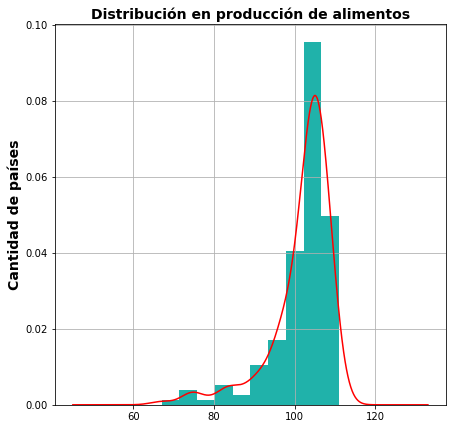

In [10]:
alims_pais.plot.kde(color="red")
alims_pais.hist(figsize=(7,7), color="lightseagreen",normed=True)
plt.title("Distribución en producción de alimentos", fontsize=14, weight="bold")
plt.ylabel("Cantidad de países", fontsize=14, weight="bold")

Ahora bien, el histograma anterior muestra la magnitud y distribución en la producción de alimentos, pero deja de lado cuestionamientos y segmentaciones como las siguientes:


* Mayor alimento producido en el mundo
* Mayores productores de "Feed" y "Food"
* Comparativo de producción entre "Feed" y "Food"
* Tendencia de producción de los mayores productores

De esta manera, a continuación se presentan las respuestas a los puntos anteriores:

In [11]:
#Se utilizan máscaras booleanas para crear dos sub-datasets y diferenciar entre "feed" y "food"

fao_feed= fao[fao["Element"]== "Feed"] 
fao_food= fao[fao["Element"]== "Food"]


In [12]:
fao_feed.sort_values(ascending=False, by="Production (1000 tonnes)").head()

,Area Abbreviation,Area,Item,Element,latitude,longitude,Year,Production (1000 tonnes)
1121040,CHN,"China, mainland",Cereals - Excluding Beer,Feed,35.86,104.20,2013,193043.0
1099563,CHN,"China, mainland",Cereals - Excluding Beer,Feed,35.86,104.20,2012,181259.0
944017,USA,United States of America,Cereals - Excluding Beer,Feed,37.09,-95.71,2004,170320.0
858109,USA,United States of America,Cereals - Excluding Beer,Feed,37.09,-95.71,2000,167643.0
729247,USA,United States of America,Cereals - Excluding Beer,Feed,37.09,-95.71,1994,166992.0


Al tener tanta información vale la pena calcular la proporción, en función de producción, que existe. De esta manera, el análisis puede centrarse en una muestra que represente el mayor porcentaje de producción en importancia.
Para esto se crea una columna, en cada dataset, llamada "Percentage_Production" y se agrupan los datos por "Area" y el porcentaje de producción calculado.

In [13]:
fao_feed["Percentage_Production"] = (fao_feed["Production (1000 tonnes)"] /fao_feed["Production (1000 tonnes)"].sum())*100
fao_food["Percentage_Production"] = (fao_food["Production (1000 tonnes)"] /fao_food["Production (1000 tonnes)"].sum())*100


biggest_feed_producers=fao_feed.groupby("Area")["Percentage_Production"].sum().sort_values(ascending=False)

biggest_food_producers=fao_food.groupby("Area")["Percentage_Production"].sum().sort_values(ascending=False)

biggest_food_producers.head()


Area
China, mainland             19.488374
India                       11.094794
United States of America     8.417210
Russian Federation           3.882374
Brazil                       3.014812
Name: Percentage_Production, dtype: float64

Ahora bien, teniendo los datos ordenados por "Area" y mayor porcentaje de producción, se puede hacer un análisis sobre los principales 20 productores, a nivel mundial, tanto de "food" como de "feed".

Como primer punto se dibujan dos histogramas que muestren la distribución de producción.

Text(0, 0.5, 'Porcentaje de producción')

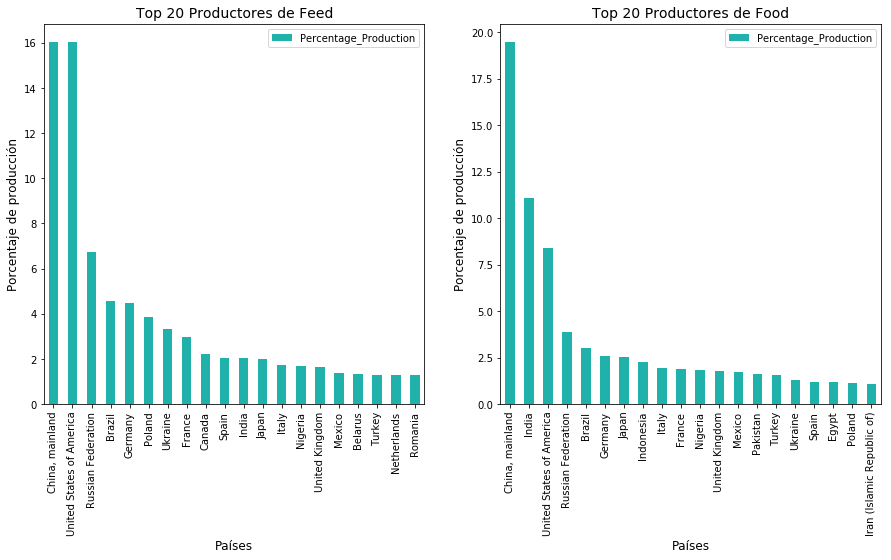

In [14]:
biggest_feed_producers=pd.DataFrame(biggest_feed_producers)[:20]
biggest_food_producers=pd.DataFrame(biggest_food_producers)[:20]


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))  # 1 row, 2 columns

#Gráfico de barras para productores feed
biggest_feed_producers.plot(kind="bar",color="lightseagreen", ax=ax1,)
ax1.set_title("Top 20 Productores de Feed", fontsize=14)
ax1.set_xlabel("Países", fontsize=12)
ax1.set_ylabel("Porcentaje de producción", fontsize=12)


#Gráfico de barras para productores de food
biggest_food_producers.plot(kind="bar", color="lightseagreen", ax=ax2)
ax2.set_title("Top 20 Productores de Food", fontsize=14)
ax2.set_xlabel("Países", fontsize=12)
ax2.set_ylabel("Porcentaje de producción", fontsize=12)




De los gráficos anteriores se puede notar que:

1) China mainland es el mayor productor tanto de alimentos para humanos como para animales. Esto hace sentido según el reporte de la OMC (Organización Mundial de Comercio) en dónde se destaca que la producción agrícula del país chino aumentó hasta en un 30% durante el 2008. (China lidera en producción de alimentos, 2010)

2) En la producción de alimentos para animales existen dos grandes productores con porcentajes de producción muy similares: China mainland y Estados Unidos

3) En la producción de alimentos para humanos India tiene muchísima participación, sin embargo, a diferencia de la producción de alimentos para animales, en la producción de alimentos para humanos China mainland tiene casi que el doble de nivel de producción que el país más cercano (India)

Ahora bien, para visualizar de más sencilla cuáles son los principales productores de alimentos (tanto de food como feed) se procede a crear un mapa-mundi con una escala de color que muestre lo anterior.

In [15]:
#Cargando el mapa-mundi a utilizar
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map

#Ajustando el GeoDataFrame invocado
world_map=world_map.rename(columns={"name":"Area", "iso_a3":"Area Abbreviation"})
world_map.head()


,pop_est,continent,Area,Area Abbreviation,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


Como se observa en la tabla anterior, el dataset ingerido "world_map" contiene los países alrededor del mundo con sus coordenadas de localización mediante la series "geometry" que contiene "shapely objects". De esta manera, con dicho dataset es posible trabajar con GeoPandas ya que su estructura es de un GeoDataFrame.

Bien, con lo anterior listo se procede con la programación de cada uno de los datasets a utilizar para mostrar los mayores productores de feed y food alrededor del mundo.

In [16]:
#Se genera un DataFrame con la información relevante para el mapeo

biggest_food_producers_map = fao_food.groupby(["Area Abbreviation","Area","latitude","longitude"],as_index=False)["Percentage_Production"].sum()


biggest_food_producers_map =pd.DataFrame(biggest_food_producers_map)

#Se crea la columna "Coordinates" que se utilizara, de ser necesario, para generar otro shapely object con las coordenadas (POINTS)

biggest_food_producers_map["Coordinates"] = list(zip(biggest_food_producers_map.latitude, biggest_food_producers_map.longitude))

#biggest_food_producers_map["Coordinates"] = biggest_food_producers_map["Coordinates"].apply(Point)
#biggest_food_producers_map = gpd.GeoDataFrame(biggest_food_producers_map, geometry="Coordinates")


biggest_food_producers_map.head()

,Area Abbreviation,Area,latitude,longitude,Percentage_Production,Coordinates
0,AFG,Afghanistan,33.94,67.71,0.207988,"(33.94, 67.71)"
1,AGO,Angola,-11.20,17.87,0.180531,"(-11.2, 17.87)"
2,ALB,Albania,41.15,20.17,0.066604,"(41.15, 20.17)"
3,ARE,United Arab Emirates,23.42,53.85,0.061947,"(23.42, 53.85)"
4,ARG,Argentina,-38.42,-63.62,0.849536,"(-38.42, -63.62)"


In [17]:
world_map.head()

,pop_est,continent,Area,Area Abbreviation,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


Teniendo los datasets listos, se procede a unificarlos para crear el GeoDataFrame que permitirá la graficación del mapa con la escala deseada.

In [18]:
merged_geodataframes= pd.merge(biggest_food_producers_map, world_map, on="Area Abbreviation", how="inner")
merged_geodataframes.head()



,Area Abbreviation,Area_x,latitude,longitude,Percentage_Production,Coordinates,pop_est,continent,Area_y,gdp_md_est,geometry
0,AFG,Afghanistan,33.94,67.71,0.207988,"(33.94, 67.71)",28400000.0,Asia,Afghanistan,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,AGO,Angola,-11.20,17.87,0.180531,"(-11.2, 17.87)",12799293.0,Africa,Angola,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,ALB,Albania,41.15,20.17,0.066604,"(41.15, 20.17)",3639453.0,Europe,Albania,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,ARE,United Arab Emirates,23.42,53.85,0.061947,"(23.42, 53.85)",4798491.0,Asia,United Arab Emirates,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,ARG,Argentina,-38.42,-63.62,0.849536,"(-38.42, -63.62)",40913584.0,South America,Argentina,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [19]:
geodataframe_map= merged_geodataframes.drop(labels=["pop_est","continent","gdp_md_est","Coordinates","latitude","longitude","Area_y"], axis=1)
geodataframe_map = gpd.GeoDataFrame(geodataframe_map, geometry="geometry")
geodataframe_map.head()

,Area Abbreviation,Area_x,Percentage_Production,geometry
0,AFG,Afghanistan,0.207988,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,AGO,Angola,0.180531,(POLYGON ((16.32652835456705 -5.87747039146621...
2,ALB,Albania,0.066604,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,ARE,United Arab Emirates,0.061947,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,ARG,Argentina,0.849536,(POLYGON ((-65.50000000000003 -55.199999999999...


Una vez listo el GeoDataFrame, se programa el series que generará la escala de calor y el gráfico utilizando MatPlotLib.

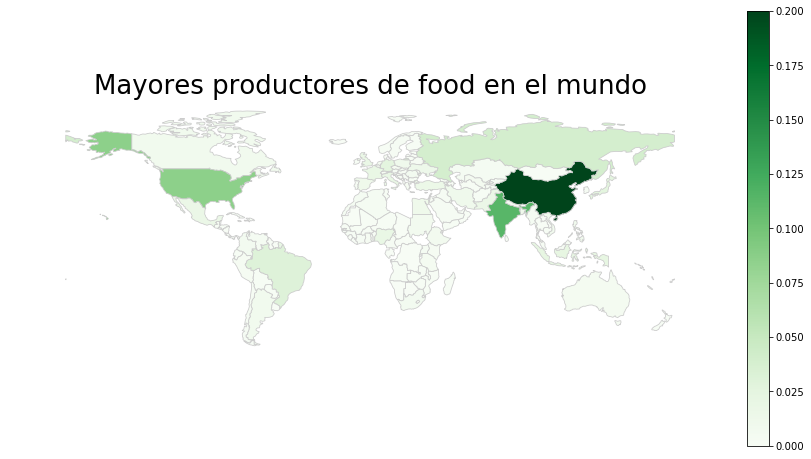

In [20]:
# Se configura una variable con el "Series" a medir

percentage_production = geodataframe_map["Percentage_Production"]

# Se crea la figura en Matplotlib

fig, ax = plt.subplots(1, figsize=(15, 8))

# Se genera el gráfico

geodataframe_map.plot(column=percentage_production, cmap="Greens", linewidth=0.8, ax=ax, edgecolor="0.8")
plt.axis("off")
plt.title("Mayores productores de food en el mundo", fontsize=26)


# Crear una barra de color para ver escala

vmin, vmax = 0, 0.20
escala = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Se crea un arreglo vacío para la escala

escala._A = []

# Se genera la escala

cbar = fig.colorbar(escala)

El gráfico anterior permite tener una visualización rápida y sencilla de los mayores productores de food alrededor del mundo. Tal y como se descata por color, China lidera la producción con aproximadamente un 20% de participación.

A continuación se realiza lo mismo para conocer los mayores productores de feed.

In [21]:
#Se genera un DataFrame con la información relevante para el mapeo

biggest_feed_producers_map = fao_feed.groupby(["Area Abbreviation","Area","latitude","longitude"],as_index=False)["Percentage_Production"].sum()
biggest_feed_producers_map.sort_values(by="Percentage_Production", ascending=False)
biggest_feed_producers_map =pd.DataFrame(biggest_feed_producers_map)

#Se crea la columna "Coordinates" que se utilizara, de ser necesario, para generar el shapely object con las coordenadas

biggest_feed_producers_map["Coordinates"] = list(zip(biggest_feed_producers_map.latitude, biggest_feed_producers_map.longitude))

#biggest_feed_producers_map["Coordinates"] = biggest_food_producers_map["Coordinates"].apply(Point)

#biggest_feed_producers_map = gpd.GeoDataFrame(biggest_feed_producers_map, geometry="Coordinates")

biggest_feed_producers_map.sort_values(by="Percentage_Production", ascending=False)
biggest_feed_producers_map.head()

,Area Abbreviation,Area,latitude,longitude,Percentage_Production,Coordinates
0,AFG,Afghanistan,33.94,67.71,0.042487,"(33.94, 67.71)"
1,AGO,Angola,-11.20,17.87,0.148368,"(-11.2, 17.87)"
2,ALB,Albania,41.15,20.17,0.030679,"(41.15, 20.17)"
3,ARE,United Arab Emirates,23.42,53.85,0.028420,"(23.42, 53.85)"
4,ARG,Argentina,-38.42,-63.62,0.654588,"(-38.42, -63.62)"


In [22]:
merged_geodataframes_feed= pd.merge(biggest_feed_producers_map, world_map, on="Area Abbreviation", how="inner")
merged_geodataframes_feed.head()

geodataframe_map_feed= merged_geodataframes_feed.drop(labels=["pop_est","continent","gdp_md_est","Coordinates","latitude","longitude","Area_y"], axis=1)
geodataframe_map_feed = gpd.GeoDataFrame(geodataframe_map_feed, geometry="geometry")
geodataframe_map_feed.head()

,Area Abbreviation,Area_x,Percentage_Production,geometry
0,AFG,Afghanistan,0.042487,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,AGO,Angola,0.148368,(POLYGON ((16.32652835456705 -5.87747039146621...
2,ALB,Albania,0.030679,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,ARE,United Arab Emirates,0.028420,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,ARG,Argentina,0.654588,(POLYGON ((-65.50000000000003 -55.199999999999...


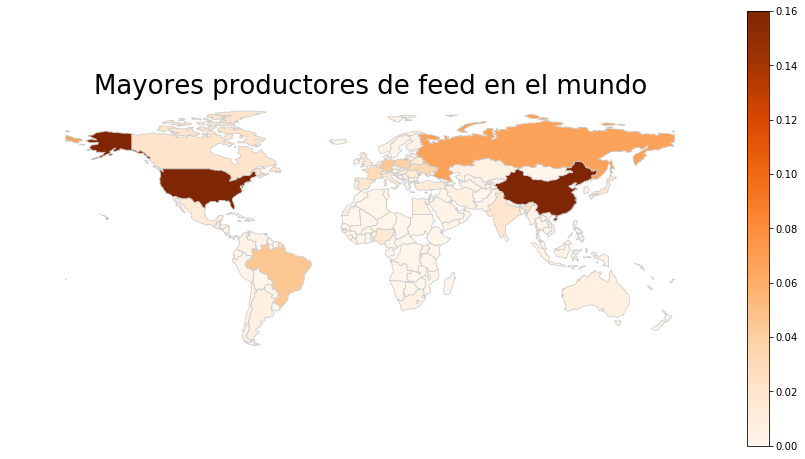

In [23]:
# Se configura una variable con el "Series" a medir

percentage_production_feed = geodataframe_map_feed["Percentage_Production"]

# Se crea la figura en Matplotlib

fig, ax = plt.subplots(1, figsize=(15, 8))

# Se genera el gráfico

geodataframe_map_feed.plot(column=percentage_production_feed, cmap="Oranges", linewidth=0.8, ax=ax, edgecolor="0.8")
plt.axis("off")
plt.title("Mayores productores de feed en el mundo", fontsize=26)



# Crear una barra de color para ver escala

vmin_feed, vmax_feed = 0, 0.16
escala_feed = plt.cm.ScalarMappable(cmap="Oranges", norm=plt.Normalize(vmin=vmin_feed, vmax=vmax_feed))

# Se crea un arreglo vacío para la escala

escala_feed._A = []

# Se crea la escala

cbar = fig.colorbar(escala_feed)

Este gráfico es más interesante que el anterior debido a que la producción de "feed" está más distribuida y no se concentra únicamente en China.
Tal y como se observa, países como Estados Unidos, Rusia y Brasil también tienen relevancia en cuanto a los alimentos que se producen para consumo animal.

Bien, conociendo los mayores productores vale la pena indagar sobre los alimentos que más se producen en cada caso.

Lo primero que se realiza es generar un nuevo dataframe con los 20 principales alimentos en producción.

Text(0, 0.5, 'Porcentaje de producción')

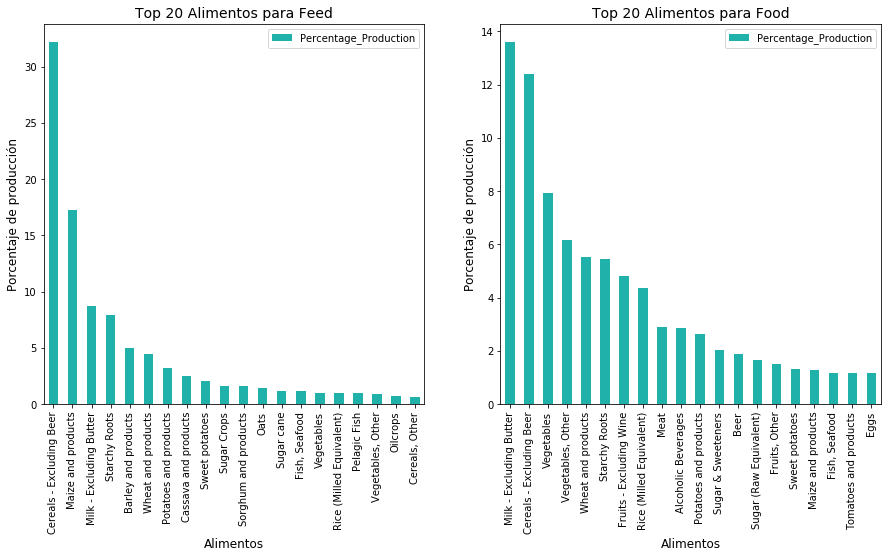

In [24]:
#Se genera un groupby por item y porcentaje de producción
most_produced_feed=fao_feed.groupby("Item")["Percentage_Production"].sum().sort_values(ascending=False)
most_produced_food=fao_food.groupby("Item")["Percentage_Production"].sum().sort_values(ascending=False)

#Se convierte en dataframe y se filtran los 20 principales productos
most_produced_feed=pd.DataFrame(most_produced_feed)[:20]
most_produced_food=pd.DataFrame(most_produced_food)[:20]

#Se crea el canvas y ejes para graficación.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))  # 1 row, 2 columns


#Se genera el gráfico para el top 20 de alimentos para feed
most_produced_feed.plot(kind="bar",color="lightseagreen", ax=ax1,)
ax1.set_title("Top 20 Alimentos para Feed", fontsize=14)
ax1.set_xlabel("Alimentos", fontsize=12)
ax1.set_ylabel("Porcentaje de producción", fontsize=12)

#Se genera el gráfico para el top 20 de alimentos para food
most_produced_food.plot(kind="bar", color="lightseagreen", ax=ax2)
ax2.set_title("Top 20 Alimentos para Food", fontsize=14)
ax2.set_xlabel("Alimentos", fontsize=12)
ax2.set_ylabel("Porcentaje de producción", fontsize=12)




De los gráficos anteriores se deduce que:

1) Los productos provenientes de cereales (excluyendo derivados como la cerveza y mantequilla) son uno de los principales alimentos tanto para humanos como para animales.

2) Los cereales también tienen muchísima importancia en la alimentación para humanos, siendo el segundo producto en porcentaje de producción.

3) Los cereales gobiernan la producción, con más de un 30% de la totalidad, para los alimentos que se destinan a animales.

4) El alimento que mayoritariamente se produce para humanos es la leche (excluyendo su derivado de mantequilla).

5) A pesar de los movimientos contra el consumo de carnes rojas, este alimento sigue produciéndose en mayor porcentaje que sus similares (pescado y mariscos).
 

Viendo el top 20 tanto para productores como alimentos, es momento de unificar los resultados obtenidos.

Se sabe que China mainland es un país con alta producción de cereales, sin embargo, se descubriran cuáles son los alimentos (tanto para humanos como para animales) que más se producen en dicho país y cuál ha sido su comportamiento en el tiempo. 

In [25]:
#Se crea dataframe de China, mainland para alimentos (food)

china_mask = fao_food["Area"] == "China, mainland"
china_food_total= fao_food[china_mask]

#Se genera un groupby por Item para conocer la producción total de cada alimento durante el tiempo en estudio
china_food= china_food_total.groupby(by=["Item"])["Production (1000 tonnes)"].sum()
china_food= china_food.to_frame()


#Se crea una nueva columna con el porcentaje de producción para conocer los alimentos de mayor importancia
china_food["Percentage_Production"] = (china_food["Production (1000 tonnes)"] /china_food["Production (1000 tonnes)"].sum())*100
china_food.sort_values(by=["Percentage_Production"], ascending=False).head()

,Production (1000 tonnes),Percentage_Production
Item,,
Vegetables,9046594.0,14.897928
Cereals - Excluding Beer,8678866.0,14.292354
"Vegetables, Other",7962498.0,13.112639
Starchy Roots,4623978.0,7.614766
Rice (Milled Equivalent),4271067.0,7.033592


Increíble, a pesar de que los "Vegetables" están en la tercer posición del alimento que más se produce para el consumo humano, es el producto de mayor importancia en la producción del país chino, seguido por los cereales (excluyendo la cerveza) y otros vegetales y almidón.

Conociendo lo anterior, veámos cuál ha sido el comportamiento en la producción de estos productos a lo largo del tiempo.

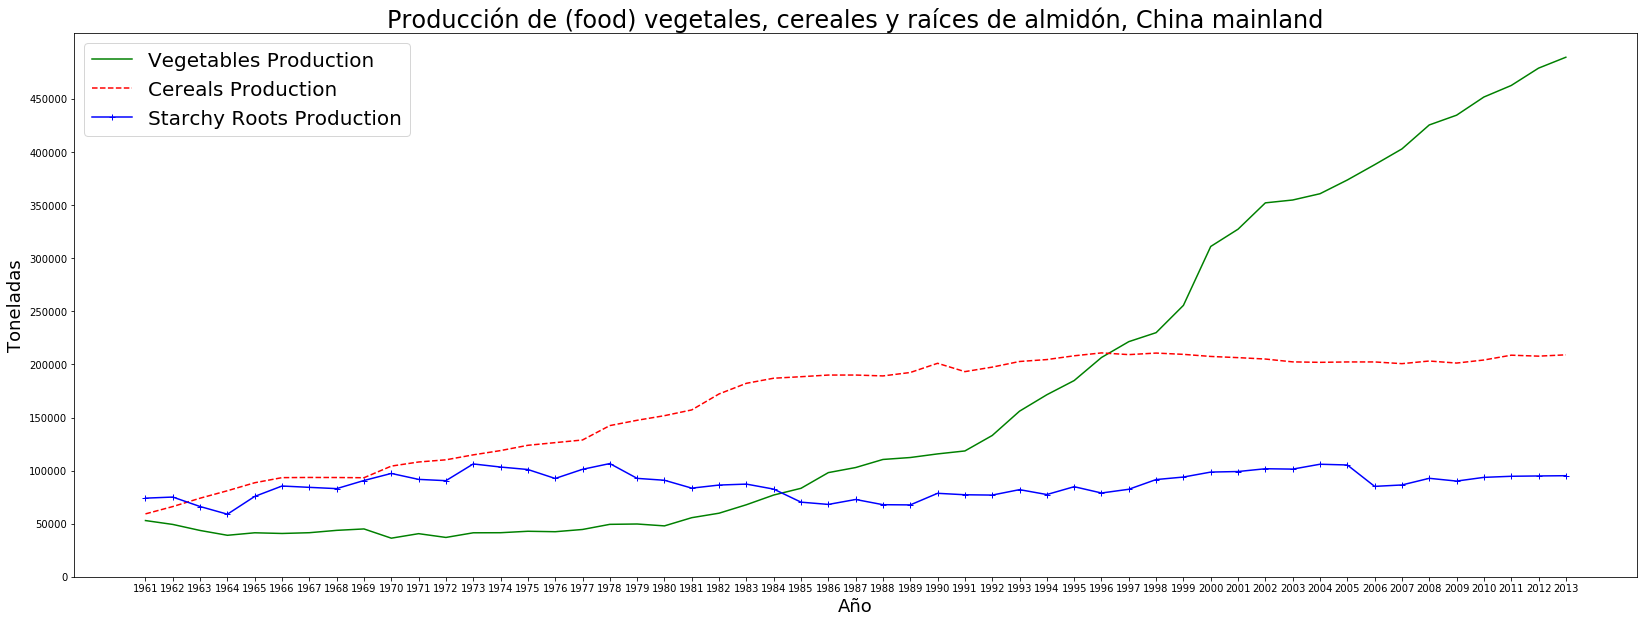

In [26]:
#línea de tendencia para Vegetables
vegetables_mask = china_food_total["Item"] == "Vegetables"
china_vegetables = china_food_total[vegetables_mask]
china_vegetables=china_vegetables.rename(columns = {"Production (1000 tonnes)":"Vegetables Production"})

x_vegetables= china_vegetables["Year"]
y_vegetables= china_vegetables["Vegetables Production"]

#línea de tendencia para Cereales
cereal_mask = china_food_total["Item"] == "Cereals - Excluding Beer"
china_cereals = china_food_total[cereal_mask]
china_cereals=china_cereals.rename(columns = {"Production (1000 tonnes)":"Cereals Production"})

x_cereals= china_cereals["Year"]
y_cereals= china_cereals["Cereals Production"]

#línea de tendencia para Almidón
starchy_mask = china_food_total["Item"] == "Starchy Roots"
china_starchy = china_food_total[starchy_mask]
china_starchy=china_starchy.rename(columns = {"Production (1000 tonnes)":"Starchy Roots Production"})
x_starchy= china_starchy["Year"]
y_starchy= china_starchy["Starchy Roots Production"]

#Generación del gráfico
ymin= 0
ymax= 500000

fig, ax= plt.subplots(figsize=(28,10))

ax.plot(x_vegetables,y_vegetables, "g")
ax.plot(x_cereals,y_cereals, "r--")
ax.plot(x_starchy,y_starchy, "b+-")
plt.xlabel("Año", fontsize=18)
plt.ylabel("Toneladas", fontsize=18)
plt.yticks(np.arange(ymin,ymax, 50000))
plt.title("Producción de (food) vegetales, cereales y raíces de almidón, China mainland", fontsize=24)
ax.legend(loc=0, fontsize=20)

Como se observa en la gráfica anterior, a partir del año 1997 se ve una clara distinción en cuanto a la producción de vegetales (para el consumo humano) con respecto a la produccion de cereales y almidón.
El fenómeno que se presenta no es de extrañar debido a que en la década de los 90's las reformas radicales de Deng provocaron una alta privatización (1997-1998) y llevaron a fuertes implicaciones en el crecimiento del PIB, aumento de la riqueza per cápita, entre otros.

Ahora, de la misma forma se indagará un poco más en la producción de alimentos para el consumo animal en el país chino.

In [27]:
fao_feed.head()

,Area Abbreviation,Area,Item,Element,latitude,longitude,Year,Production (1000 tonnes),Percentage_Production
2,AFG,Afghanistan,Barley and products,Feed,33.94,67.71,1961,76.0,0.000079
4,AFG,Afghanistan,Maize and products,Feed,33.94,67.71,1961,210.0,0.000217
9,AFG,Afghanistan,Sugar cane,Feed,33.94,67.71,1961,45.0,0.000047
10,AFG,Afghanistan,Sugar beet,Feed,33.94,67.71,1961,0.0,0.000000
14,AFG,Afghanistan,"Pulses, Other and products",Feed,33.94,67.71,1961,1.0,0.000001


In [28]:
#Se crea dataframe de China, mainland para los alimentos feed

china_mask_feed = fao_feed["Area"] == "China, mainland"

china_feed_total= fao_feed[china_mask_feed]
china_feed= china_feed_total.groupby(by=["Item"])["Production (1000 tonnes)"].sum()
china_feed= china_feed.to_frame()

china_feed["Percentage_Production"] = (china_feed["Production (1000 tonnes)"] /china_feed["Production (1000 tonnes)"].sum())*100

china_feed.sort_values(by=["Percentage_Production"], ascending=False).head()

,Production (1000 tonnes),Percentage_Production
Item,,
Cereals - Excluding Beer,4084713.0,26.310517
Maize and products,3216608.0,20.718865
Starchy Roots,2532274.0,16.310923
Sweet potatoes,1853059.0,11.935952
Rice (Milled Equivalent),491505.0,3.165890


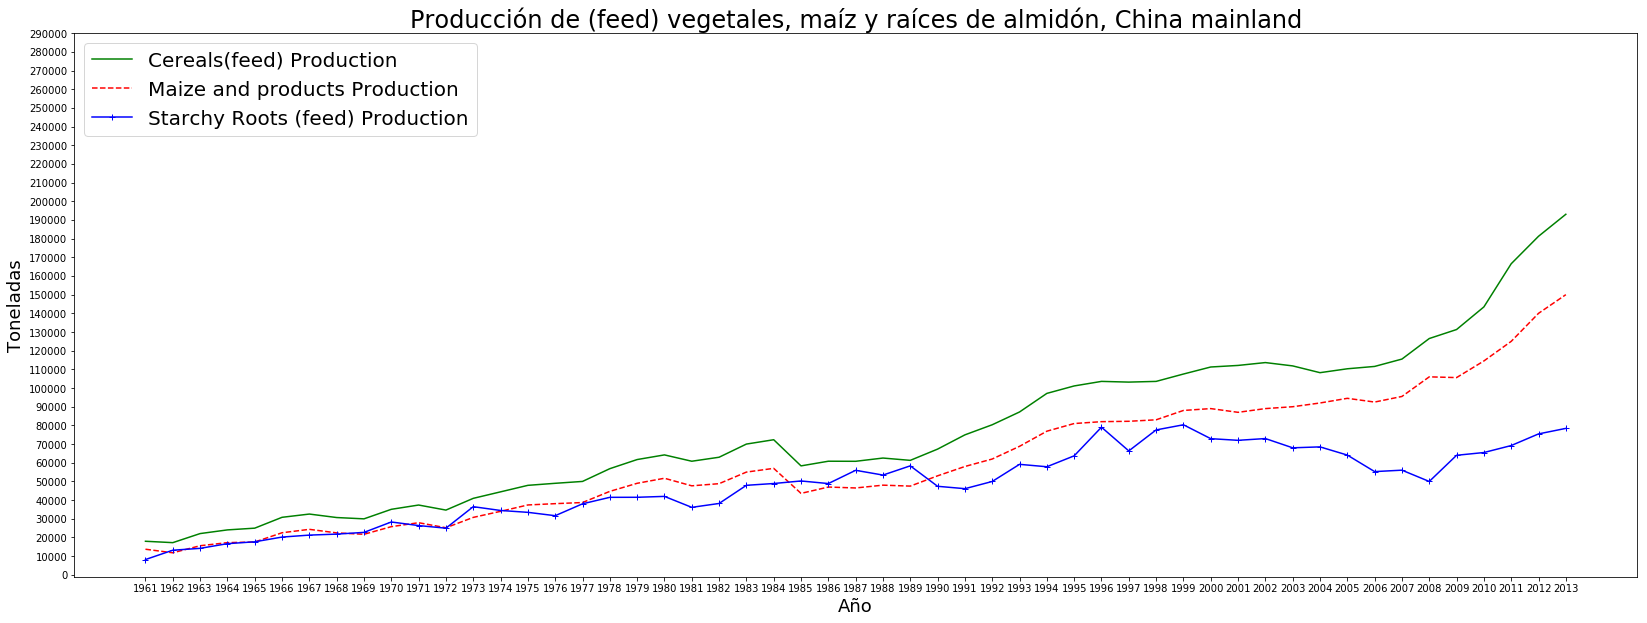

In [29]:
cereal_mask_feed = china_feed_total["Item"] == "Cereals - Excluding Beer"
china_cereals_feed = china_feed_total[cereal_mask_feed]
china_cereals_feed=china_cereals_feed.rename(columns = {"Production (1000 tonnes)":"Cereals(feed) Production"})

x_cereals_feed= china_cereals_feed["Year"]
y_cereals_feed= china_cereals_feed["Cereals(feed) Production"]


maize_mask = china_feed_total["Item"] == "Maize and products"
china_maize = china_feed_total[maize_mask]
china_maize=china_maize.rename(columns = {"Production (1000 tonnes)":"Maize and products Production"})

x_maize= china_maize["Year"]
y_maize= china_maize["Maize and products Production"]


starchy_mask_feed = china_feed_total["Item"] == "Starchy Roots"
china_starchy_feed = china_feed_total[starchy_mask_feed]
china_starchy_feed=china_starchy_feed.rename(columns = {"Production (1000 tonnes)":"Starchy Roots (feed) Production"})

x_starchy_feed= china_starchy_feed["Year"]
y_starchy_feed= china_starchy_feed["Starchy Roots (feed) Production"]


ymin= 0
ymax= 300000

fig, ax= plt.subplots(figsize=(28,10))

ax.plot(x_cereals_feed,y_cereals_feed, "g")
ax.plot(x_maize,y_maize, "r--")
ax.plot(x_starchy_feed,y_starchy_feed, "b+-")
plt.xlabel("Año", fontsize=18) 
plt.ylabel("Toneladas", fontsize=18)
plt.yticks(np.arange(ymin,ymax, 10000))
plt.title("Producción de (feed) vegetales, maíz y raíces de almidón, China mainland", fontsize=24)
ax.legend(loc=2, fontsize=20)

Como se observa, a diferencia de la producción de alimentos para humanos el comportamiento en la producción de comida para animales es bastante constante en cuanto crecimiento para 3 de los 5 productos principales. 
Importante notar que a partir del 2008, se nota un comportamiento exponencial en el crecimiento de la producción para cada uno de los alimentos en donde descatan los cereales como el principal.

Bien, hasta el momento se ha hecho una exploración de:

* Principales productores de feed y food a nivel mundial.

* Principales alimentos producidos para consumo humano y animal.

* Mapeo con la distribución de producción de alimentos para animales y humano.

* Principales alimentos producidos en China, mainland como ejemplo del mayor productor tanto de feed como de food.

* Tendencia a lo largo del tiempo en la elaboración de los alimentos con mayor producción en China.

Como parte final, se indagará sobre algunas proporciones generales en la producción de alimentos contestando las siguientes interrogantes:

1) ¿Cuál es la proporción de producción de los alimentos destinados para animales versus los destinados para humanos?

2) Comparar por año la producción total de feed contra la producción total de food y ver su comportamiento y tendencia.

In [30]:
total_feed = fao_feed["Production (1000 tonnes)"].sum()
total_food = fao_food["Production (1000 tonnes)"].sum()

food_vs_feed = total_food / total_feed
food_vs_feed

3.221642353033019

En términos generales, la producción de alimentos para humanos es de un 322% sobre los productos que se elaboran para consumo animal. Esto, a pesar de ser un dato bastante genérico, da una cierta luz respecto a la distribución en el esfuerzo que se está implementando para la producción de los animales. Si bien es cierto que se tomaron en cuenta todos los productos elaborados, sin importar que puedan o no ser consumidos por humanos, aún así la producción para consumo humano es mayor indicando que los otros animales no representan mayor consumo que nuestra especie.

([<matplotlib.axis.YTick at 0x1f2aa6357b8>,
 <a list of 11 Text yticklabel objects>)

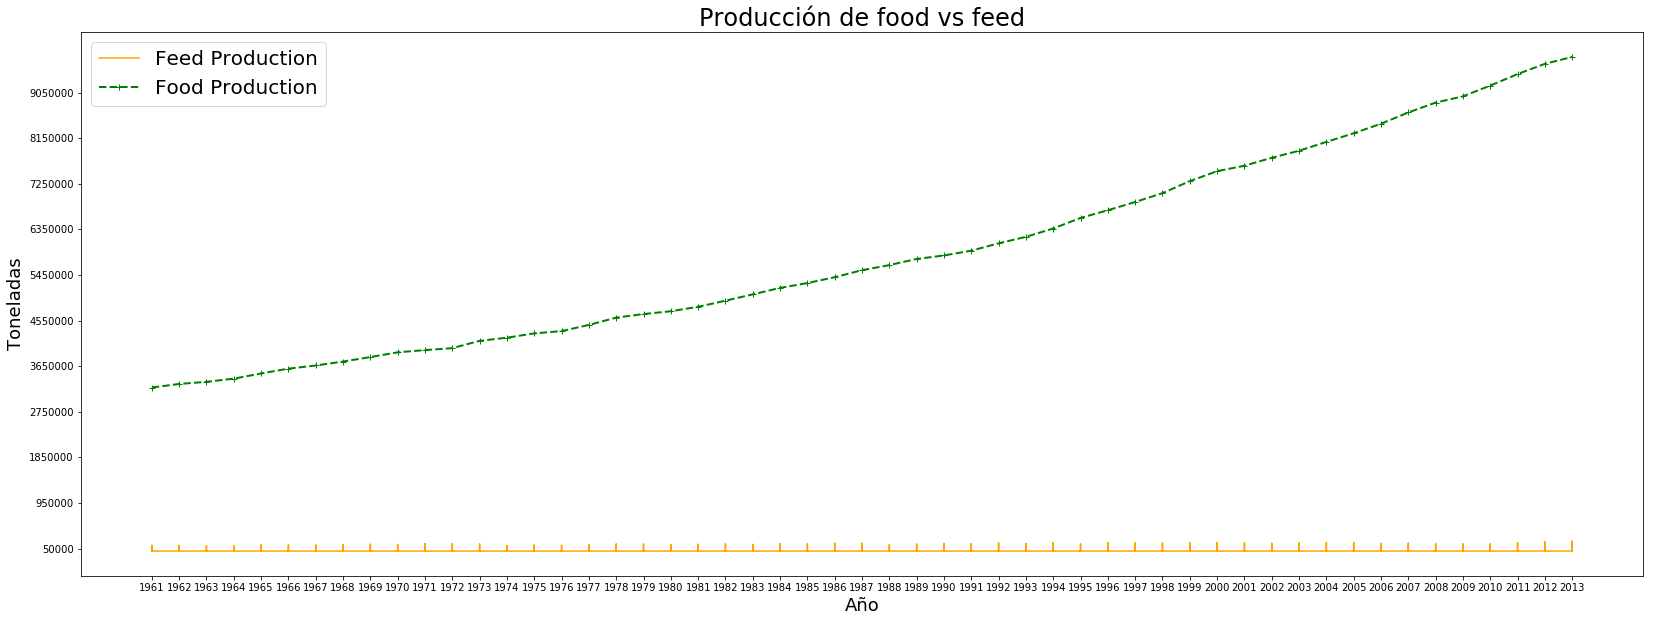

In [31]:
#línea de tendencia para Feed Production
feed_year= fao_feed.groupby(by=["Year"], as_index=False)["Production (1000 tonnes)"].sum()
feed_year=fao_feed.rename(columns = {"Production (1000 tonnes)":"Feed Production"})

x_feed_year= feed_year["Year"]
y_feed_year= feed_year["Feed Production"]

#línea de tendencia para Feed Production
food_year= fao_food.groupby(by=["Year"], as_index=False)["Production (1000 tonnes)"].sum()
food_year=food_year.rename(columns = {"Production (1000 tonnes)":"Food Production"})

x_food_year= food_year["Year"]
y_food_year= food_year["Food Production"]


#Generación del gráfico
fig, ax= plt.subplots(figsize=(28,10))

ax.plot(x_feed_year,y_feed_year, color="orange")
ax.plot(x_food_year,y_food_year, color="green", marker="+", linestyle="dashed",linewidth=2, markersize=6)

plt.xlabel("Año", fontsize=18) 
plt.ylabel("Toneladas", fontsize=18)
plt.title("Producción de food vs feed", fontsize=24)
ax.legend(loc=2, fontsize=20)

ymin=50000
ymax=9752737.0
plt.yticks(np.arange(ymin,ymax, 900000))


Como se observa, la producción de alimentos para consumo humanos ha presentando una tendencia positiva de incremento durante el período en estudio (1961-2013), mientras que los productos elaborados para consumo animal han tenido una constancia en su producción.
Este descubrimiento deja a la vista que la demanda por comida humana tiene un comportamiento casi exponencial por el crecimiento de la población mientras que los animales no exponen este reto.

Lo anterior podría pensarse como algo positivo si se toma en cuenta que China (el mayor productor de alimentos a nivel mundial) ha incrementado su producción de vegetales ("alimentos saludables") para cubrir la demanda de los humanos. Sin embargo, habría que tomar en consideración comportamientos de los diferentes productos elaborados para tener una opinión objetiva al respecto y hacer una comparación con la demanda real de alimentos que existe, al día de hoy, tomando como base la cantidad de personas vivas y el total de toneladas de productos que se elaboran y son suficientes para la sobrevivencia del humano.





<h2>Referencias</h2>

China lidera en producción de alimentos. (2010). Tomado desde https://expansion.mx/economia/2010/02/25/china-produce-mas-alimentos-que-eu

Oppenheim, D. (2018). Who eats the food we grow?. Tomado desde https://www.kaggle.com/dorbicycle/world-foodfeed-production 

UN. (2015). World population projected to reach 9.7 billion by 2050. Tomado desde http://www.un.org/en/development/desa/news/population/2015-report.html